# Image Filtering Project


# Importing Libraries


In [150]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Main


## Image loading


In [151]:
DATA_FOLDER_PATH = "../Data" #Specify Data folder directory here
FILENAME = "barbara.jpg" #Specify file name here


filepath = os.path.join(DATA_FOLDER_PATH, FILENAME)

In [152]:
image = Image.open(filepath).convert('L') #Load image as a grayscale
image = np.array(image) #Convert Image to array

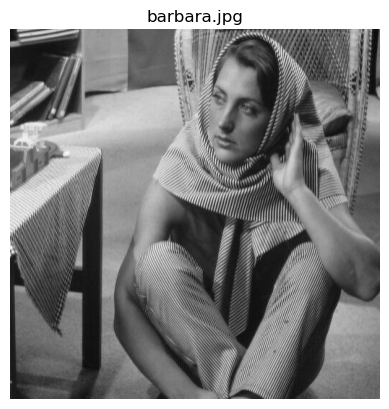

In [153]:
##Display loaded image

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(FILENAME)
plt.show()

## Gradient Filter


In [154]:
##Compute kernel for horizontal and vertical gradient

kernelGradientHorizontal = np.array([[-1, 0, 1],
                                    [-1, 0, 1],
                                    [-1, 0, 1]])

kernelGradientVertical = np.array([[-1, -1, -1],
                                    [0, 0, 0],
                                    [1, 1, 1]])

In [155]:
## Calculate both gradient filters

gradientImageHorizontal = cv2.filter2D(image, -1, kernelGradientHorizontal)
gradientImageVertical = cv2.filter2D(image, -1, kernelGradientVertical)

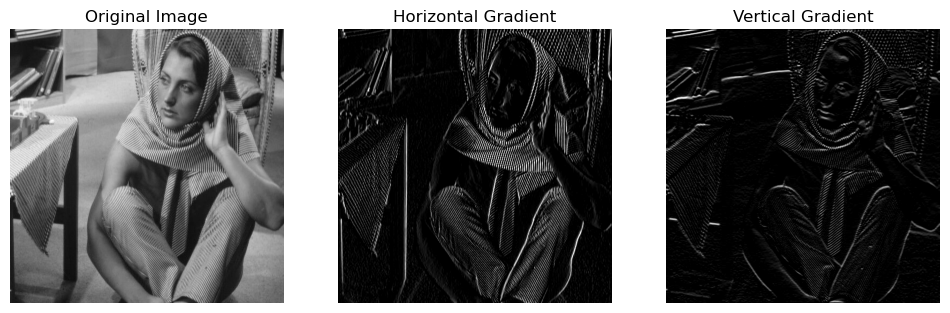

In [156]:
## Display both gradient simultaneously

_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize =(12, 12))

ax1.imshow(image, cmap='gray')
ax1.set_title("Original Image")
ax1.axis('off')

ax2.imshow(gradientImageHorizontal, cmap='gray')
ax2.set_title("Horizontal Gradient")
ax2.axis('off')

ax3.imshow(gradientImageVertical, cmap='gray')
ax3.set_title("Vertical Gradient")
ax3.axis('off')

plt.show()

In [157]:
## Compute gradient magnitude

gradientImageMagnitude = abs(gradientImageHorizontal) + abs(gradientImageVertical)

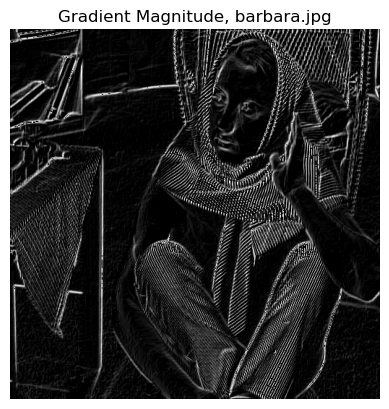

In [158]:
## Display results

plt.imshow(gradientImageMagnitude, cmap='gray')
plt.title(f"Gradient Magnitude, {FILENAME}")
plt.axis('off')
plt.show()

The Gradient Filter computes a discretized gradient of the image in both directions (Horizontal/Vertical).

Since the gradient of an image corresponds with sudden changes in color, it's used to detect edges of an image.


## Sobel Filter


Horizontal Kernel for Sobel filter is (Vertical Kernel is just its transposed form) :

\begin{equation}
\begin{pmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1 \\
\end{pmatrix}
\end{equation}

Here, we'll use the Sobel function from cv2 (does the exact same thing as filter with this kernel).


In [159]:
## Calculate both Sobel filters

sobelImageHorizontal = cv2.Sobel(image, -1, 1, 0)
sobelImageVertical = cv2.Sobel(image, -1, 0, 1)

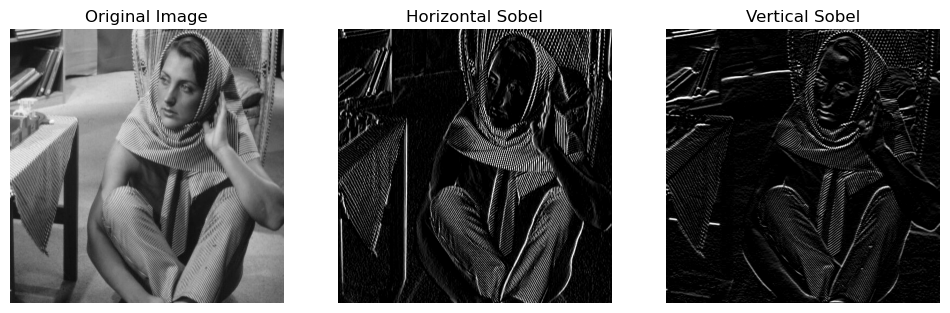

In [160]:
## Display both gradient simultaneously

_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize =(12, 12))

ax1.imshow(image, cmap='gray')
ax1.set_title("Original Image")
ax1.axis('off')

ax2.imshow(sobelImageHorizontal, cmap='gray')
ax2.set_title("Horizontal Sobel")
ax2.axis('off')

ax3.imshow(sobelImageVertical, cmap='gray')
ax3.set_title("Vertical Sobel")
ax3.axis('off')

plt.show()

In [161]:
## Compute gradient in absolute magnitude

sobelImageMagnitude = abs(sobelImageHorizontal) + abs(sobelImageVertical)

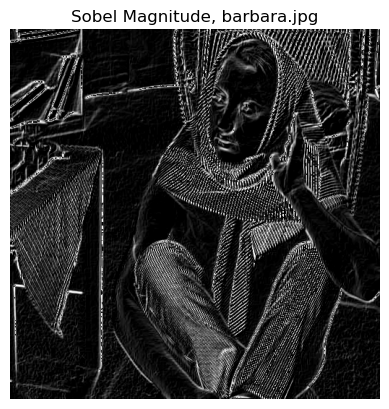

In [162]:
## Display results
plt.imshow(sobelImageMagnitude, cmap='gray')
plt.title(f"Sobel Magnitude, {FILENAME}")
plt.axis('off')

plt.show()

The Sobel filter does the same thing as the Gradient Filter, but the 2 value in the middle row/column smooth the image in the horizontal/vertical direction : that way, the filter is less affected by noise.


## Averaging Filter


Kernel for Averaging filter is obtained by summing all values in a 3x3 area (and normalizing) :

\begin{equation}
\frac{1}{9}
\begin{pmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \\
\end{pmatrix}
\end{equation}

Here, we'll use the blur function from cv2 (does the exact same thing as cv.filter with this kernel).


In [163]:
## Calculate averaging filter

averageImage = cv2.blur(image, ksize=(3, 3))

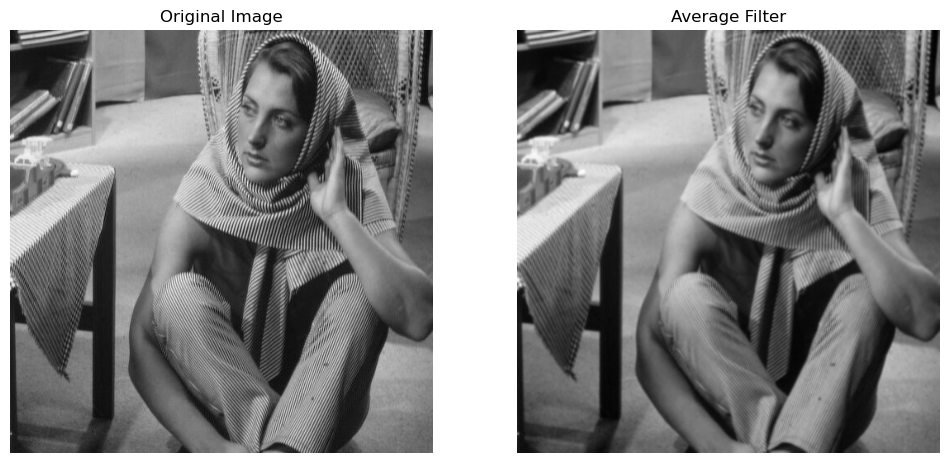

In [164]:
## Display both gradient simultaneously

_, (ax1, ax2) = plt.subplots(1, 2, figsize =(12, 12))

ax1.imshow(image, cmap='gray')
ax1.set_title("Original Image")
ax1.axis('off')

ax2.imshow(averageImage, cmap='gray')
ax2.set_title("Average Filter")
ax2.axis('off')


plt.show()

The averaging filter computes a blurrier image of the original data, by averaging the values of a 3x3 region of an image.


## Gaussian Filter


3x3 Kernel for a Gaussian filter is computed using a gaussian normal function (normalized) :

\begin{equation}
\frac{1}{16}
\begin{pmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1 \\
\end{pmatrix}
\end{equation}

Here, we'll use the GaussianBlur function from cv2 (does the exact same thing as cv.filter with this kernel).


In [165]:
## Calculate Gaussian filter

gaussianImage = cv2.GaussianBlur(image, (3, 3), 1)

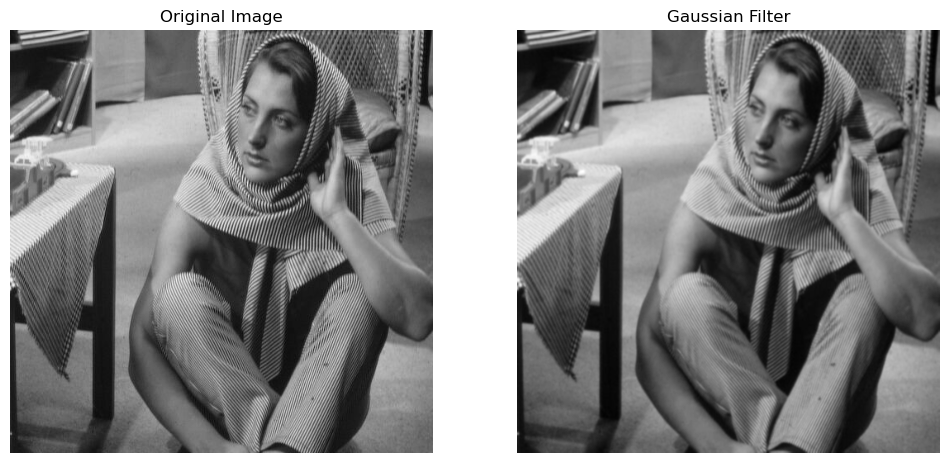

In [166]:
## Display both gradient simultaneously

_, (ax1, ax2) = plt.subplots(1, 2, figsize =(12, 12))

ax1.imshow(image, cmap='gray')
ax1.set_title("Original Image")
ax1.axis('off')

ax2.imshow(gaussianImage, cmap='gray')
ax2.set_title("Gaussian Filter")
ax2.axis('off')


plt.show()

The Gaussian Filter computes the same effect as the averaging filter, but since its Fourier Transform is also a gaussian function, it's better to use than the averaging filter.
